# Correlations

In [2]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
import requests
import re
import time
import requests
from scipy import stats

In [4]:
# Set up paths relative to notebook location
os.chdir("/Users/doma/Documents/Bachelor_Arbeit/Code")
project_root = Path.cwd() 

# Pathway to Dataset with all legit proteins
output_path_nout_cleaned = Path(project_root) / "data" / "processed" / "N_out_proteome_cleaned.csv"             # UniProt Entries
output_path_multispan_cleaned = Path(project_root) / "data" / "processed" / "Multispan_proteome_cleaned.csv"    # UniProt Entries

# Load the both dataset with protein UniProt entries
human_nout = pd.read_csv(output_path_nout_cleaned, usecols=["entry"])
multispan_proteome = pd.read_csv(output_path_multispan_cleaned, usecols=["Entry"])

# Pathway to protein statistics
path_singlespan_statistics = Path(project_root) / "data" / "processed" / "N_Out_Statistics_Rank"
path_multispan_statistics = Path(project_root) / "data" / "processed" / "Multispan_Statistics_Rank"

In [ ]:
# Correlations - per protein 
    # mean
    # median...

# Description of my plan.
- means per residue of one protein

In [5]:
protein = "P05067" 
singlespan = pd.read_csv(os.path.join(path_singlespan_statistics, protein + "_statistics.csv"))

0.7150648646691191 1.5503597446426852e-121


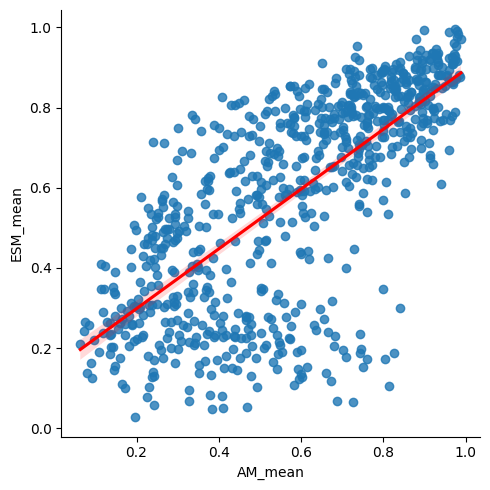

In [6]:
#singlespan = pd.read_csv(os.path.join(path_singlespan_statistics, protein + "_statistics.csv"))

sns.lmplot(x="AM_mean", y="ESM_mean" , data=singlespan, line_kws={"color": "red"})
statistics, pvalue = stats.pearsonr(singlespan["AM_mean"], singlespan["ESM_mean"])
plt.savefig("/Users/doma/Documents/Bachelor_Arbeit/Code/results/images/5.4.Correlations/P05067.png")
print(statistics, pvalue)

In [108]:
statistics = []
pvalue = []
count = 0 

for protein in human_nout["entry"]:
    try:
        single = pd.read_csv(os.path.join(path_singlespan_statistics, protein + "_statistics.csv"))
    except:
        count += 1
        
    stat, pval = stats.pearsonr(single["AM_mean"], single["ESM_mean"])
    statistics.append(stat)
    pvalue.append(pvalue)

print(count)

11


0.6838680455807162


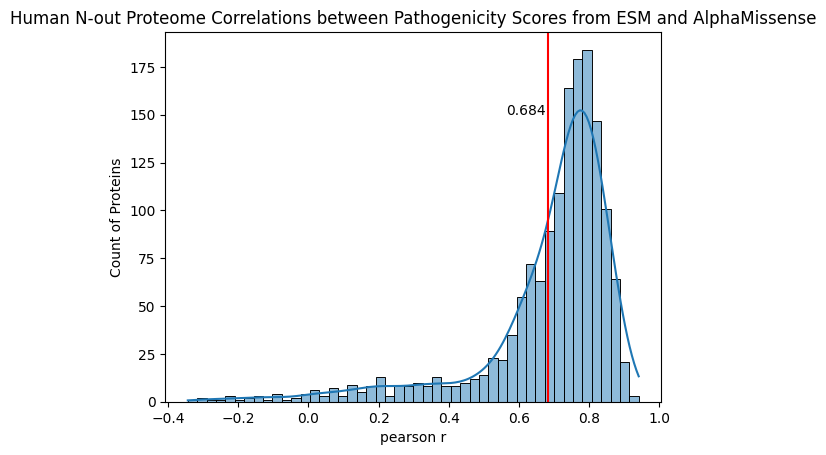

In [109]:
mean = np.mean(statistics)
print(mean)
sns.histplot(data=statistics, kde=True)
plt.axvline(mean, color="red")
plt.xlabel("pearson r")
plt.ylabel("Count of Proteins")
plt.text(x=mean-0.12, y=150, s=round(mean,3))
plt.title("Human N-out Proteome Correlations between Pathogenicity Scores from ESM and AlphaMissense")
plt.savefig("/Users/doma/Documents/Bachelor_Arbeit/Code/results/images/5.4.Correlations/human_proteome_correlations.png")
plt.show()

In [3]:
from scipy.stats import pearsonr

# Paths to directories
esm_dir = "/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/ESM1b_rank_csv"
alpha_dir = "/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/AlphaMissense_rank_csv"

# Initialize lists to hold matching cell values
esm_values = []
alpha_values = []

# Get list of AlphaMissense files (base protein names)
alpha_files = [f for f in os.listdir(alpha_dir) if f.endswith("_rank.csv")]

for file in tqdm(alpha_files):
    protein = file.replace("_rank.csv", "")
    
    alpha_path = os.path.join(alpha_dir, file)
    esm_path = os.path.join(esm_dir, protein + "_LLR_rank.csv")
    
    # Check if corresponding ESM1b file exists
    if not os.path.exists(esm_path):
        continue

    try:
        # Read files (index_col=0 so amino acids are the row index)
        alpha_df = pd.read_csv(alpha_path, index_col=0)
        esm_df = pd.read_csv(esm_path, index_col=0)
        
        # Ensure both have the same shape and index/columns
        alpha_df, esm_df = alpha_df.align(esm_df, join='inner', axis=0)
        alpha_df, esm_df = alpha_df.align(esm_df, join='inner', axis=1)

        # Flatten and drop NaNs
        a_vals = alpha_df.values.flatten()
        e_vals = esm_df.values.flatten()
        
        # Only keep pairs where both are valid numbers
        mask = ~np.isnan(a_vals) & ~np.isnan(e_vals)
        alpha_values.extend(a_vals[mask])
        esm_values.extend(e_vals[mask])

    except Exception as e:
        print(f"Error processing {protein}: {e}")
        continue

# Convert to NumPy arrays
alpha_values = np.array(alpha_values)
esm_values = np.array(esm_values)

# Compute Pearson correlation
r, p = pearsonr(esm_values, alpha_values)
print(f"Pearson correlation (r): {r:.4f}, p-value: {p:.2e}")

  0%|          | 0/20246 [00:00<?, ?it/s]

Pearson correlation (r): 0.6969, p-value: 0.00e+00
